In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

In [2]:
IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
CLASSES = 10  # number of outputs = number of digits

In [3]:
def build(input_shape, classes):
    model = models.Sequential()
    # CONV => RELU => POOL
    model.add(layers.Convolution2D(filters = 6, kernel_size = 5, activation='tanh',
                                   padding='same', input_shape=input_shape))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    # CONV => RELU => POOL
    model.add(layers.Convolution2D(16, kernel_size = 5, activation='tanh'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    model.add(layers.Convolution2D(120, kernel_size = 5, activation='tanh'))    
    # Flatten => RELU layers
    model.add(layers.Flatten())
    model.add(layers.Dense(84, activation='tanh'))
    # a softmax classifier
    model.add(layers.Dense(classes, activation="softmax"))
    return model

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
# reshape
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [8]:
# normalize
X_train, X_test = X_train / 255.0, X_test / 255.0

In [9]:
# cast
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [10]:
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [11]:
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, CLASSES)

In [12]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [13]:
# initialize the optimizer and model
model = build(input_shape=INPUT_SHAPE, classes=CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [14]:
# fit 
history = model.fit(X_train, y_train, batch_size=128, epochs=20,
                    verbose=1, validation_split=0.1)

Epoch 1/20
422/422 [==============================] - 12s 27ms/step - loss: 0.3583 - accuracy: 0.8998 - val_loss: 0.1382 - val_accuracy: 0.9612
Epoch 2/20
422/422 [==============================] - 12s 28ms/step - loss: 0.1368 - accuracy: 0.9587 - val_loss: 0.0949 - val_accuracy: 0.9732
Epoch 3/20
422/422 [==============================] - 12s 29ms/step - loss: 0.0894 - accuracy: 0.9720 - val_loss: 0.0749 - val_accuracy: 0.9800
Epoch 4/20
422/422 [==============================] - 13s 31ms/step - loss: 0.0680 - accuracy: 0.9789 - val_loss: 0.0621 - val_accuracy: 0.9808
Epoch 5/20
422/422 [==============================] - 12s 29ms/step - loss: 0.0516 - accuracy: 0.9843 - val_loss: 0.0552 - val_accuracy: 0.9840
Epoch 6/20
422/422 [==============================] - 12s 29ms/step - loss: 0.0414 - accuracy: 0.9869 - val_loss: 0.0515 - val_accuracy: 0.9853
Epoch 7/20
422/422 [==============================] - 12s 29ms/step - loss: 0.0345 - accuracy: 0.9894 - val_loss: 0.0537 - val_accuracy:

In [15]:
score = model.evaluate(X_test, y_test, verbose=1)
print("\nTest loss:", score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0551 - accuracy: 0.9862

Test loss: 0.055070050060749054
Test accuracy: 0.9861999750137329


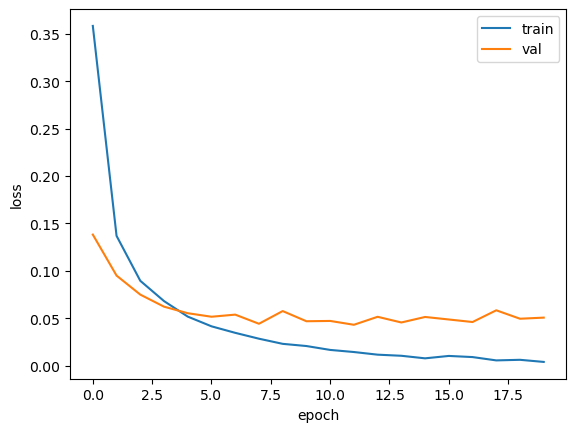

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

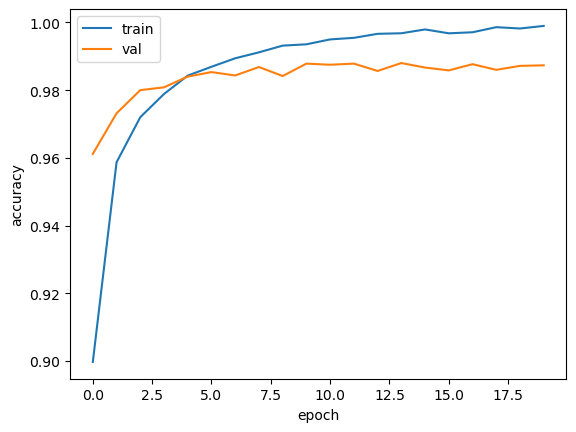

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()